### Galfit tutorial

In [ ]:
# Galfit installation - go here and download the file that is appropriate for your machine:
# https://users.obs.carnegiescience.edu/peng/work/galfit/galfit.html

In [ ]:
# ^Also on here are some really helpful tutorials and tips and frequenty asked questions from users
# The creator of Galfit, Chien Peng, has done a great job responding to user questions in the papers

In [ ]:
# how to run Galfit from the terminal command line:
# ~/Applications/galfit galfit.feedme


In [ ]:
# First you need a feedme file, which looks like this:
'''
===============================================================================
# IMAGE and GALFIT CONTROL PARAMETERS
A) out_convolved_1237648704594182574.fits            # Input data image (FITS file)
B) out_1237648704594182574.fits       # Output data image block
C) out_sigma_convolved_1237648704594182574.fits                # Sigma image name (made from data i$
D) none        # Input PSF image and (optional) diffusion kernel
E) none                   # PSF fine sampling factor relative to data
F) none                # Bad pixel mask (FITS image or ASCII coord list)
G) none                # File with parameter constraints (ASCII file)
H) 1    253   1    253   # Image region to fit (xmin xmax ymin ymax)
I) 253 253          # Size of the convolution box (x y)
J) 26.563 # Magnitude photometric zeropoint
K) 0.5  0.5        # Plate scale (dx dy)    [arcsec per pixel]
O) regular             # Display type (regular, curses, both)
P) 0                   # Choose: 0=optimize, 1=model, 2=imgblock, 3=subcomps
# Object number: 1
 0) sersic                 #  object type
 1) 126.855 126.8753  1 1  #  position x, y
 3) 15.38191040303383    1          #  Integrated magnitude
 4) 18.077      1          #  R_e (half-light radius)   [pix]
 5) 2      1          #  Sersic index n (de Vaucouleurs n=4)
 6) 0.0000      0          #     -----
 7) 0.0000      0          #     -----
 8) 0.0000      0          #     -----
 9) 0.6032086149112685      1          #  axis ratio (b/a)
10) 44.67    1          #  position angle (PA) [deg: Up=0, Left=90]
 Z) 0                      #  output option (0 = resid., 1 = Dont subtract)
# Object number: 2
 0) sersic                 #  object type
 1) 207.739 158.4461  1 1  #  position x, y
 3) 17.470505598717725    1          #  Integrated magnitude
 4) 1.547      1          #  R_e (half-light radius)   [pix]
 5) 4      1          #  Sersic index n (de Vaucouleurs n=4)
 6) 0.0000      0          #     -----
 7) 0.0000      0          #     -----
 8) 0.0000      0          #     -----
 9) 0.9596309111880046      1          #  axis ratio (b/a)
10) 120.46000000000001    1          #  position angle (PA) [deg: Up=0, Left=90]
 Z) 0                      #  output option (0 = resid., 1 = Dont subtract)
# Object number: 4
 0) sky                    #  object type
 1) 5.847369      1          #  sky background at center of fitting region [ADU$
 2) 0.0000      0          #  dsky/dx (sky gradient in x)
 3) 0.0000      0          #  dsky/dy (sky gradient in y)
 Z) 0                      #  output option (0 = resid., 1 = Dont subtract)
================================================================================
'''

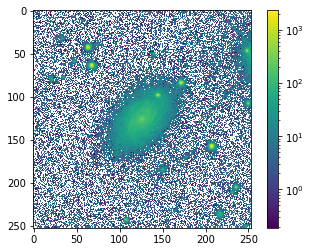

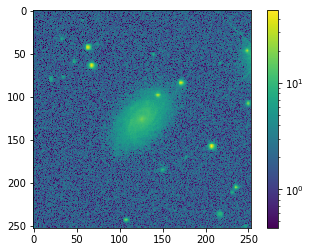

In [21]:
# You'll need have the input data image and the sigma data image in the same directory for Galfit to run
# In this case, these are called 'out_convolved_##' and 'out_sigma_convolved_###'
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import matplotlib

input_img = fits.open('../imaging/out_convolved_1237648704594182574.fits')
plt.imshow(input_img[0].data, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

input_img_sigma = fits.open('../imaging/out_sigma_convolved_1237648704594182574.fits')
plt.imshow(input_img_sigma[0].data, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()


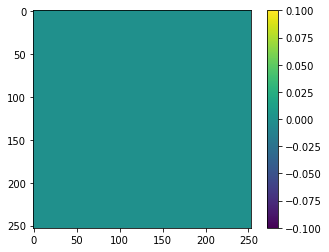

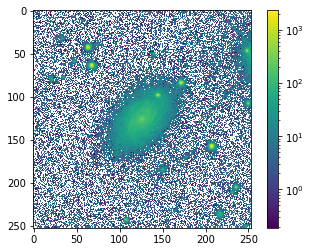

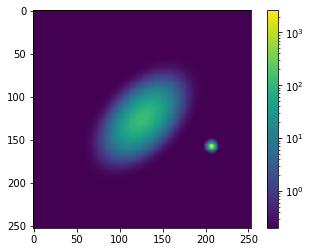

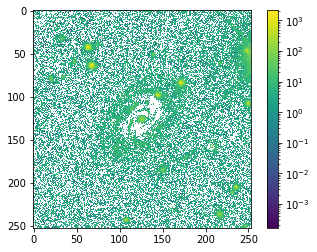

In [18]:
# The output is a multi-extension file


output = fits.open('../imaging/out_1237648704594182574.fits')

plt.imshow(output[0].data)
plt.colorbar()
plt.show()

plt.imshow(output[1].data, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

plt.imshow(output[2].data, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

plt.imshow(output[3].data, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()


In [19]:
# The header of these output files also gives you the best fit parameters for the model
print(repr(output[2].header))

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  253 / Length of data axis 1                          
NAXIS2  =                  253 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'galfit.feedme_1237648704594182574' / GALFIT input file               
DATAIN  = 'out_convolved_1237648704594182574.fits' / Input data image           
SIGMA   = 'out_sigma_convolved_1237648704594182574.fits' / Input sigma image    
PSF     = 'none    '           / Convolution PSF and kernel                     
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        

In [ ]:
# as an advanced option, it's also possible to run Galfit through python, which I definitely recommend :)
# The following code creates the feedme and also initiates galfit
# As an additional note, Galfit can be strung together with source extractor, which can help you find the 
# location of bright sources, which is then the input guess to Galfit 
# (if you're doing this for a bunch of galaxies this can be super helpful)

'''Writes the galfit feedme file'''
def write_galfit_feedme(name,xcen,ycen,xcen2,ycen2, mag, mag_zpt, num_bulges, length_gal, r_1, r_2, mag_2, B_A_1, PA_1, B_A_2, PA_2, background):
    
    if num_bulges==2: 
    
        '''I need to make a code to write out the GALFIT.feedme file'''
        file = open('imaging/galfit.feedme_'+str(name), "w")
        file.write('==============================================================================='+'\n')

        file.write('# IMAGE and GALFIT CONTROL PARAMETERS'+'\n')


        file.write('A) out_convolved_'+str(name)+'.fits            # Input data image (FITS file)'+'\n')
        file.write('B) out_'+str(name)+'.fits       # Output data image block'+'\n')
        file.write('C) out_sigma_convolved_'+str(name)+'.fits                # Sigma image name (made from data i$'+'\n')
        file.write('D) none        # Input PSF image and (optional) diffusion kernel'+'\n')
        file.write('E) none                   # PSF fine sampling factor relative to data'+'\n')
        file.write('F) none                # Bad pixel mask (FITS image or ASCII coord list)'+'\n')
        file.write('G) none                # File with parameter constraints (ASCII file)'+'\n')
        file.write('H) 1    '+str(length_gal)+'   1    '+str(length_gal)+'   # Image region to fit (xmin xmax ymin ymax)'+'\n')
        file.write('I) '+str(length_gal)+' '+ str(length_gal)+'          # Size of the convolution box (x y)'+'\n')
        file.write('J) '+str(mag_zpt)+' # Magnitude photometric zeropoint'+'\n')
        file.write('K) 0.5  0.5        # Plate scale (dx dy)    [arcsec per pixel]'+'\n')
        file.write('O) regular             # Display type (regular, curses, both)'+'\n')
        file.write('P) 0                   # Choose: 0=optimize, 1=model, 2=imgblock, 3=subcomps'+'\n')

        #first bulge
        file.write('# Object number: 1 '+'\n')
        file.write(' 0) sersic                 #  object type'+'\n')
        file.write(' 1) '+str(xcen)+' '+str(ycen)+'  1 1  #  position x, y'+'\n')#these positions need to be automated
        file.write(' 3) '+str(mag)+'    1          #  Integrated magnitude'+'\n')#'+str(mag)+'
        file.write(' 4) '+str(r_1)+'      1          #  R_e (half-light radius)   [pix]'+'\n')
        file.write(' 5) 2      1          #  Sersic index n (de Vaucouleurs n=4)'+'\n')
        file.write(' 6) 0.0000      0          #     -----'+'\n')
        file.write(' 7) 0.0000      0          #     -----'+'\n')
        file.write(' 8) 0.0000      0          #     -----'+'\n')
        file.write(' 9) '+str(B_A_1)+'      1          #  axis ratio (b/a)'+'\n')
        file.write('10) '+str(PA_1+90)+'    1          #  position angle (PA) [deg: Up=0, Left=90]'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')

        
        file.write('# Object number: 2 '+'\n')
        file.write(' 0) sersic                 #  object type'+'\n')
        file.write(' 1) '+str(xcen2)+' '+str(ycen2)+'  1 1  #  position x, y'+'\n')
        file.write(' 3) '+str(mag_2)+'    1          #  Integrated magnitude'+'\n')#'+str(mag)+'
        file.write(' 4) '+str(r_2)+'      1          #  R_e (half-light radius)   [pix]'+'\n')
        file.write(' 5) 4      1          #  Sersic index n (de Vaucouleurs n=4)'+'\n')
        file.write(' 6) 0.0000      0          #     -----'+'\n')
        file.write(' 7) 0.0000      0          #     -----'+'\n')
        file.write(' 8) 0.0000      0          #     -----'+'\n')
        file.write(' 9) '+str(B_A_2)+'      1          #  axis ratio (b/a)'+'\n')
        file.write('10) '+str(PA_2+90)+'    1          #  position angle (PA) [deg: Up=0, Left=90]'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')

        '''file.write('# Object number: 3 '+'\n')
        file.write(' 0) sersic                 #  object type'+'\n')
        file.write(' 1) '+str(xcen)+' '+str(ycen)+'  1 1  #  position x, y'+'\n')#these positions need to be automated                                                                                 
        file.write(' 3) '+str(mag)+'    1          #  Integrated magnitude'+'\n')#'+str(mag)+'                                                                                                         
        file.write(' 4) '+str(r_1)+'      1          #  R_e (half-light radius)   [pix]'+'\n')
        file.write(' 5) 1      1          #  Sersic index n (de Vaucouleurs n=4)'+'\n')
        file.write(' 6) 0.0000      0          #     -----'+'\n')
        file.write(' 7) 0.0000      0          #     -----'+'\n')
        file.write(' 8) 0.0000      0          #     -----'+'\n')
        file.write(' 9) '+str(B_A_1)+'      1          #  axis ratio (b/a)'+'\n')
        file.write('10) '+str(PA_1+90)+'    1          #  position angle (PA) [deg: Up=0, Left=90]'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')'''
    
    
        file.write('# Object number: 4'+'\n')
        file.write(' 0) sky                    #  object type'+'\n')
        file.write(' 1) '+str(background)+'      1          #  sky background at center of fitting region [ADU$'+'\n')
        #was 100.3920      1    
        file.write(' 2) 0.0000      0          #  dsky/dx (sky gradient in x)'+'\n')
        file.write(' 3) 0.0000      0          #  dsky/dy (sky gradient in y)'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')

        file.write('================================================================================'+'\n')
    if num_bulges==1:
        '''I need to make a code to write out the GALFIT.feedme file'''
        file = open('imaging/galfit.feedme_'+str(name), "w")
        file.write('==============================================================================='+'\n')

        file.write('# IMAGE and GALFIT CONTROL PARAMETERS'+'\n')


        file.write('A) out_convolved_'+str(name)+'.fits            # Input data image (FITS file)'+'\n')
        file.write('B) out_'+str(name)+'.fits       # Output data image block'+'\n')
        file.write('C) out_sigma_convolved_'+str(name)+'.fits                # Sigma image name (made from data i$'+'\n')
        file.write('D) none   #        # Input PSF image and (optional) diffusion kernel'+'\n')
        file.write('E) none                   # PSF fine sampling factor relative to data'+'\n')
        file.write('F) none                # Bad pixel mask (FITS image or ASCII coord list)'+'\n')
        file.write('G) none                # File with parameter constraints (ASCII file)'+'\n')
        file.write('H) 1    '+str(length_gal)+'   1    '+str(length_gal)+'   # Image region to fit (xmin xmax ymin ymax)'+'\n')
        file.write('I) '+str(length_gal)+' '+ str(length_gal)+'          # Size of the convolution box (x y)'+'\n')
        file.write('J) '+str(mag_zpt)+' # Magnitude photometric zeropoint'+'\n')
        
        file.write('K) 0.5  0.5        # Plate scale (dx dy)    [arcsec per pixel]'+'\n')
        file.write('O) regular             # Display type (regular, curses, both)'+'\n')
        file.write('P) 0                   # Choose: 0=optimize, 1=model, 2=imgblock, 3=subcomps'+'\n')

        #first bulge
        file.write('# Object number: 1 '+'\n')
        file.write(' 0) sersic                 #  object type'+'\n')
        file.write(' 1) '+str(xcen)+' '+str(ycen)+'  1 1  #  position x, y'+'\n')#these positions need to be automated
        file.write(' 3) '+str(mag)+'     1          #  Integrated magnitude'+'\n')#'+str(mag)+'
        file.write(' 4) '+str(r_1)+'      1          #  R_e (half-light radius)   [pix]'+'\n')
        file.write(' 5) 2      1          #  Sersic index n (de Vaucouleurs n=4)'+'\n')
        file.write(' 6) 0.0000      0          #     -----'+'\n')
        file.write(' 7) 0.0000      0          #     -----'+'\n')
        file.write(' 8) 0.0000      0          #     -----'+'\n')
        file.write(' 9) '+str(B_A_1)+'     1          #  axis ratio (b/a)'+'\n')
        file.write('10) '+str(PA_1+90)+'    1          #  position angle (PA) [deg: Up=0, Left=90]'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')

        '''file.write('# Object number: 2 '+'\n')
        file.write(' 0) sersic                 #  object type'+'\n')
        file.write(' 1) '+str(xcen)+' '+str(ycen)+'  1 1  #  position x, y'+'\n')#these positions need to be automated                                                                                 
        file.write(' 3) '+str(mag)+'     1          #  Integrated magnitude'+'\n')#'+str(mag)+'                                                                                                        
        file.write(' 4) '+str(r_1)+'      1          #  R_e (half-light radius)   [pix]'+'\n')
        file.write(' 5) 1      1          #  Sersic index n (de Vaucouleurs n=4)'+'\n')
        file.write(' 6) 0.0000      0          #     -----'+'\n')
        file.write(' 7) 0.0000      0          #     -----'+'\n')
        file.write(' 8) 0.0000      0          #     -----'+'\n')
        file.write(' 9) '+str(B_A_1)+'     1          #  axis ratio (b/a)'+'\n')
        file.write('10) '+str(PA_1+90)+'    1          #  position angle (PA) [deg: Up=0, Left=90]'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')'''
        
        file.write('# Object number: 3'+'\n')
        file.write(' 0) sky                    #  object type'+'\n')
        file.write(' 1) '+str(background)+'      1          #  sky background at center of fitting region [ADU$'+'\n')
        #was 100.3920      1                                                                                                                                                                           
        file.write(' 2) 0.0000      0          #  dsky/dx (sky gradient in x)'+'\n')
        file.write(' 3) 0.0000      0          #  dsky/dy (sky gradient in y)'+'\n')
        file.write(' Z) 0                      #  output option (0 = resid., 1 = Dont subtract)'+'\n')

        file.write('================================================================================'+'\n')



    file.close()


'''
Calls galfit with the feedme file you created
'''

def run_galfit(name):
    os.chdir(os.path.expanduser('imaging'))# Change to your path
    
    #print('running galfit from w/i galfit folder', os.getcwd())
    call ="~/Applications/galfit galfit.feedme_"+str(name)#+">/dev/null 2>&1"
    
    ##subprocess.check_output(shlex.split(call), shell=True)
    #subprocess.call(call,shell=True)
    
    process = subprocess.Popen(call, stdout=subprocess.PIPE, stdin=subprocess.PIPE, shell=True)
    stdout, stderr = process.communicate()
    
    
    #os.system("galfit galfit.feedme_"+str(name)+">/dev/null 2>&1")
    os.chdir(os.path.expanduser('/Users/beckynevin/CfA_Code/Kinematics_and_Imaging_Merger_Identification'))
    return